In [28]:
#from __future__ import absolute_import, division, print_function, unicode_literals
#from realistic_python_call import ffi
import numpy as np
import sys
#sys.argv = ['pdm']
import tensorflow as tf

from tensorflow.python import keras
from matplotlib import pyplot as plt

class MyFcClass:
    def __init__(self):
        print ("hello in constructor of MyFcClass")
        self.Ntrain = 4000000
        self.Nvalid = 200000
        self.size = 28
        self.nclass = 1
        self.h1 = 15
        self.h2 = 10
        self.batch_size = 1000
        self.epochs = 100
        print ("num epoch: ",self.epochs)
        self.display_freq = 1
        self.learning_rate = 0.001
        self.x_train = np.zeros((self.Ntrain,self.size),dtype = 'float')
        self.y_train = np.zeros((self.Ntrain,self.nclass),dtype = 'float')
        self.x_valid = np.zeros((self.Nvalid,self.size),dtype = 'float')
        self.y_valid = np.zeros((self.Nvalid,self.nclass),dtype = 'float')
    
        self.output = self.create_model() 
    
        self.loss = 'logcosh' # 'mean_squared_error'

        self.optim = tf.keras.optimizers.Adam(lr=self.learning_rate, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
        
    def create_model(self):
        model = tf.keras.Sequential()
        model.add(tf.keras.layers.Dense(20, activation='softplus'))
        model.add(tf.keras.layers.Dense(1, activation='linear'))
        
        return model
   
    def load_data(self):
        print('now loading data')
        data_dqmc = np.loadtxt("DataSingleOut.txt", usecols = range(0,33))
        self.x_train = data_dqmc[0:self.Ntrain,4:32]
        self.y_train = data_dqmc[0:self.Ntrain,2:3]

        self.x_valid = data_dqmc[self.Ntrain:self.Ntrain+self.Nvalid,4:32]
        self.y_valid = data_dqmc[self.Ntrain:self.Ntrain+self.Nvalid,2:3]


        print('x_train:\t{}'.format(self.x_train.shape))
        print('y_train:\t{}'.format(self.y_train.shape))
        print('x_valid:\t{}'.format(self.x_valid.shape))
        print('y_valid:\t{}'.format(self.y_valid.shape))
    
    def reshape_data(self):
        w, h = self.size, 1
        self.x_train = self.x_train.reshape(self.x_train.shape[0], w, h, 1)
        self.x_test = self.x_test.reshape(self.x_test.shape[0], w, h, 1)
        
    def save_model(self):
        self.output.save('fcmodel.h5')
      
    def restore_model(self):
        self.output = tf.keras.models.load_model('fcmodel.h5')  
        
    def train_now(self):
        print('compiling now')
        self.output.compile(loss=self.loss,
                 optimizer=self.optim,
                 metrics=['accuracy'])
        print('training now')
        self.output.fit(self.x_train,
             self.y_train,
            batch_size=self.batch_size,
            epochs=self.epochs)    
        
        
    def predict_now(self):
        p = self.output.predict(self.x_valid)
        plt.plot(p,self.y_valid,'o')
        plt.show()   

In [29]:
if __name__ == "__main__":

    my_obj = MyFcClass()


hello in constructor of MyFcClass
num epoch:  100


In [30]:
    my_obj.load_data()


now loading data
x_train:	(4000000, 28)
y_train:	(4000000, 1)
x_valid:	(200000, 28)
y_valid:	(200000, 1)


In [31]:
    my_obj.train_now()


compiling now
training now
Epoch 1/100
4000/4000 [==============================] - 4s 905us/step - loss: 0.7432 - accuracy: 0.0000e+00
Epoch 2/100
4000/4000 [==============================] - 4s 912us/step - loss: 0.0579 - accuracy: 0.0000e+00
Epoch 3/100
4000/4000 [==============================] - 4s 915us/step - loss: 0.0203 - accuracy: 0.0000e+00
Epoch 4/100
4000/4000 [==============================] - 4s 911us/step - loss: 0.0088 - accuracy: 0.0000e+00
Epoch 5/100
4000/4000 [==============================] - 4s 915us/step - loss: 0.0047 - accuracy: 0.0000e+00
Epoch 6/100
4000/4000 [==============================] - 4s 913us/step - loss: 0.0026 - accuracy: 0.0000e+00
Epoch 7/100
4000/4000 [==============================] - 4s 908us/step - loss: 0.0016 - accuracy: 0.0000e+00
Epoch 8/100
4000/4000 [==============================] - 4s 911us/step - loss: 0.0012 - accuracy: 0.0000e+00
Epoch 9/100
4000/4000 [==============================] - 4s 912us/step - loss: 0.0010 - accuracy: 0.0

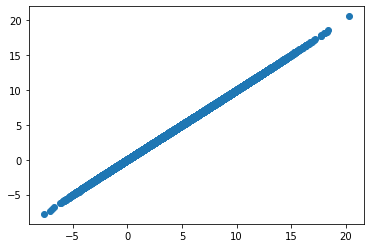

In [32]:
    my_obj.predict_now()